<a href="https://colab.research.google.com/github/vervainalthor/Hamoye-Internship/blob/master/Hamoye_stage_D%20Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Introduction   to  Keras   and Tensor
 
Keras is a deep learning API written in Python that can run on top of TensorFlow. It is quite popular among deep learning users because of its ease of use.
TensorFlow is an end-to-end open-source deep learning framework developed and maintained by Google. Similar to Numpy, TensorFlow allows for
mathematical computations and manipulation between numerical tensors, runs on CPUs, GPUs, and TPUs. Keras was incorporated in TensorFlow 2.0 (the
recent version) as tf.keras (high-level API) and can run on the aforementioned hardwares. TensorFlow also allows for low-level operations with the
TensorFlow Core API.
We will use the MNIST dataset to explain the concepts in the module. MNIST is a large database of handwritten digits commonly used in training and testing
image processing systems. The image dimensions are 28x28 numpy arrays. Now let us import the images and prepare our dataset.
P.S:    it  is  advisable   to  use Google  Colab   to  run all the code    for the content and quiz    in  this    module.

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Training data: (60000, 28, 28), (60000,)
Test data: (10000, 28, 28), (10000,)
There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


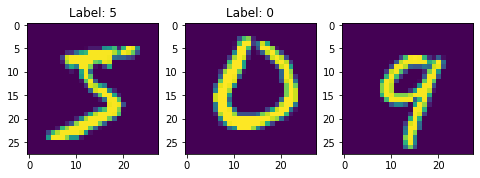

In [2]:
 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
mnist = keras.datasets.mnist 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 
print( "Training data: {}, {}" .format(train_images.shape, train_labels.shape))
print( "Test data: {}, {}" .format(test_images.shape, test_labels.shape)) 
# prints Test data: (10000, 28, 28), (10000,) 
class_labels = np.unique(train_labels) 
print( "There are {} classes in the dataset. They are: {}" .format(len(class_labels), 
class_labels)) 
# prints There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9] 
plt.figure(figsize=( 8 , 5 )) 
plt.subplot( 1 , 3 , 1 ) 
plt.imshow(train_images[ 0 ]) 
plt.title( "Label: {}" .format(train_labels[ 0 ])) 
plt.subplot( 1 , 3 , 2 ) 
plt.imshow(train_images[ 2500 ]) 
plt.title( "Label: {}" .format(train_labels[ 2500 ])) 
plt.subplot( 1 , 3 , 3 ) 
plt.imshow(test_images[ 12 ]) 
plt.show()

In [3]:
 
# As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values 
#range from 0 to 255. 
# Dividing the data by 255 scales to the required range 
train_images = train_images / 255.0 
test_images = test_images / 255.0

Text(0.5, 1.0, 'Label: 5')

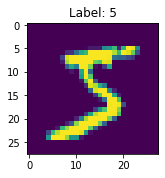

In [4]:
 
plt.figure(figsize=( 8 , 5 )) 
plt.subplot( 1 , 3 , 1 ) 
plt.imshow(train_images[ 0 ]) 
plt.title( "Label: {}" .format(train_labels[ 0 ]))

In [5]:
 
# Split training data to training and validation sets. 
x_train = train_images[ 0 : 50000 ] 
x_val = train_images[ 50000 :] 
y_train = train_labels[ 0 : 50000 ] 
y_val = train_labels[ 50000 :] 
print( "x_train: {}" .format(x_train.shape)) # prints x_train: (50000, 28, 28) 
print( "x_val: {}" .format(x_val.shape)) # prints x_val: (10000, 28, 28) 
print( "y_train: {}" .format(y_train.shape)) #prints y_train: (50000,) 
print( "y_val: {}" .format(y_val.shape)) #prints y_val: (10000,)

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [6]:
 #Encode labels to categorical variables 
from tensorflow.keras.utils import to_categorical 
no_labels = 10 
y_train = to_categorical(y_train, no_labels) 
y_val = to_categorical(y_val, no_labels) 
y_test = to_categorical(test_labels, no_labels)

In [7]:
 # Reshape data from 28 * 28 array to a single array 
new_dimension = np.prod(train_images.shape[ 1 :]) 
x_train = x_train.reshape(x_train.shape[ 0 ], new_dimension) 
x_val = x_val.reshape(x_val.shape[ 0 ], new_dimension) 
test_images = test_images.reshape(test_images.shape[ 0 ], new_dimension) 
print( "x_train: {}" .format(x_train.shape)) #prints x_train: (50000, 784) 
print( "x_val: {}" .format(x_val.shape)) #prints x_val: (10000, 784) 
print( "test_images: {}" .format(test_images.shape)) #prints test_images: (10000, 784)

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


 ## Multilayer perceptron
A perceptron is a supervised learning algorithm for binary classifiers that separates an input into two classes by learning linearly separable patterns. It is a
single layer neural network that multiplies input feature vectors by their weights, creates a weighted sum by summing these products, then adds a bias and
applies an activation function to give the final output. Perceptrons are unable to solve complex problems that are not linearly separable.

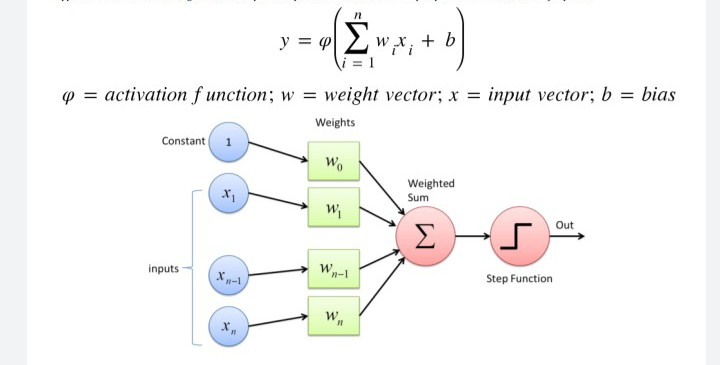

 The MultiLayer Perceptron (MLP) is a network of connected perceptrons stacked in layers with several hidden layers in between the input and output
layers. When there’s a single hidden layer, MLPs are referred to as vanilla neural networks. MLPs are feedforward neural networks where information is
transferred in the forward direction from the input layer to the output layer. The input data to the network is fed to the input layer, computations are
performed on the data in the hidden layers, and meaningful results returned in the output layer. The importance of the connections between layers is
specified by the weights assigned.

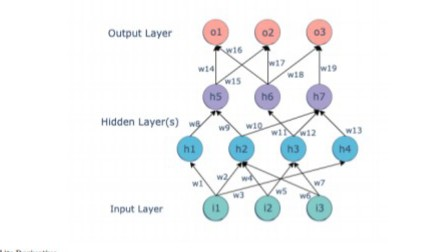

## Backpropagation and its Derivative
Backpropagation is the method of traversing the neural network in reverse (right to left) in order to obtain the gradient of neural network parameters with
respect to a loss function. It is an iterative way of updating the weights in the network to get better predictions using a form of gradient descent until the
minimum of the loss function is obtained. Different loss functions can be selected for various tasks. The loss is reduced in a controlled manner by taking
small steps from the starting point to the final point which is the lowest possible point. The derivative of the loss function provides information on which
direction to take when traversing. The weight can be updated using gradient descent which we will discuss later.
Simply put, backpropagation involves calculating the sum of errors in the network to obtain the loss function, and the partial derivative of the loss function
with respect to individual weights. It also uses gradient descent to update the weights.

 ## Activation functions and Neural NetworksHyperparameters
 
Activation functions introduce nonlinearity into the output of a neuron in a network to determine the output. This nonlinearity allows for the network to
learn complex relationships between the input and response variables. Without activation functions in an artificial neural network, there will only be linear
transformations on the input. The non-linear functions also allow for backpropagation because the gradients are obtained by derivatives of the functions
and are used in updating weights. Some activation functions commonly used include sigmoid, tanh, relu, softmax, leaky relu and many others. When training
the neural network, it is important to select the appropriate hyperparameters to improve the performance of the model. These are some of the
hyperparameters:
1. Hidden layers: this is a measure of the learning capacity of the model. The more hidden layers of neurons present in the network, the better the
learning capacity of the model. When too many layers than necessary are provided in a model, there is a tendency for overfitting to occur.
 
2. Learning rate: this controls how fast the model weights are updated before reaching optimal values. It will take the model a long time to reach the
desired weights with a very small learning rate. In contrast, if the learning rate is much higher, the model might overshoot,pass the optimal point, and
prevent convergence of the algorithm. This rate is how fast gradient descent
is performed for backpropagation.
 
 
 
3. Dropout: this is used to shut a percentage of the neurons in the network to prevent overfitting.
 
4. Batch size: the number of data samples that can be propagated through the network before weights are updated. This is important in breaking up
huge datasets into sizable batches to manage resources. This means that there are 10 batches for a dataset with 1000 samples and a batch size of 100.
 
5. Epoch: it is the number of cycles that the learning algorithm goes through the entire dataset. When all batches are fed once, an epoch is completed.

In [8]:
# inputs
#placeholders are not enabled in tf 2
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])
# create model architecture
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
 # first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))
 # second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), 
  second_bias))
 # output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)
  return logits

In [9]:
logits = multilayer_perceptron(X, no_labels) 
learning_rate = 0.01 
#we define the loss and optimiser for the network 
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)) 
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate) 
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [10]:
 
#initialise the variables
init = tf.global_variables_initializer()
 
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size
    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size 
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))
    #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.8245999813079834


# lesson 2 - Common	Regularization	for	Deep	Learning
In previous modules, we have discussed regularisation and how it prevents overϐitting in models. In deep learning, models are also susceptible to
overϐitting. As a result, different techniques have been developed to prevent overϐitting. L1 & L2 regularization, dropout, data augmentation, and early
stopping are some regularization methods.
Dropout: this is a frequently used technique in deep learning where units are ignored or dropped out in a neural network. A percentage of the
neurons on each layer in the network are randomly selected and ignored, such that they do not make any contribution in the forward and backward
pass. This automatically results in a much smaller network, where the neurons left are required to handle the representations that would have been
used for predictions by the missing neurons, through the learning of more robust features. This process improves the generalization capabilities of
the network, and reduces overϐitting on the training data.

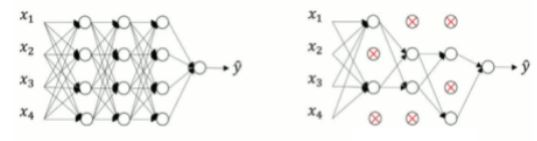

**Data augmentation**: training the model on a larger dataset is another way to prevent overϐitting. Data augmentation involves increasing the size of the
training set by introducing minor changes like rotating, cropping, ϐlipping, translating, and blurring to generate synthetic data from the dataset.

**Early stopping**: when a model is trained for a longer period such that the validation error starts to increase, overϐitting is said to occur. In early
stopping, while ϐitting the model on the training data and evaluating on the validation set, when the validation error stops reducing or gets worse, the
training process is terminated before the lowest training error is obtained, to prevent overϐitting.
## Optimisation for Training Deep Neural Networks
When solving deep learning problems, a loss function is deϐined to minimize loss using an optimization algorithm like gradient descent, gradient descent
with momentum, Adagrad, RMSProp, Adam, and others. While there are several optimisation algorithms, there are also some challenges such as local
minima, saddle points, vanishing gradients, etc, faced in deep learning optimisation.

**Local Minima**: neural networks aim to continue updating weights until the global minimum (the lowest point of the entire network) is attained. Local
minima refers to the lowest points of localised portions of a graph. The value of a loss function is minimal at a point in the local region. It is possible for the
function to be stuck at a local minimum because it is the best point in that locality, which makes it difϐicult to reach the global minimum where the lowest
loss can be achieved.

**Vanishing Gradients**: this is a problem that occurs when training a network using gradient descent methods. Vanishing gradients make it difϐicult to update
the weights in the earlier layers of the network, and worsens as the number of layers increases. As we know, with gradient descent, the gradient controls
how much learning happens in the network during training. While backpropagating in deep neural networks, the gradients tend to get smaller, and with
small gradients little or no learning is done, hence, resulting in poor performance of models.
Although we have only discussed some of the challenges in deep learning optimisation at a high level, we will now discuss some optimisation algorithms.

**Gradient Descent**: this is a common and established optimisation algorithm used to obtain the minimum of an objective function J using the negative of the
gradient to continuously move towards the steepest point. It can be likened to ϐinding the lowest point of a mountain. Gradient descent can be summed up
in the equation below:

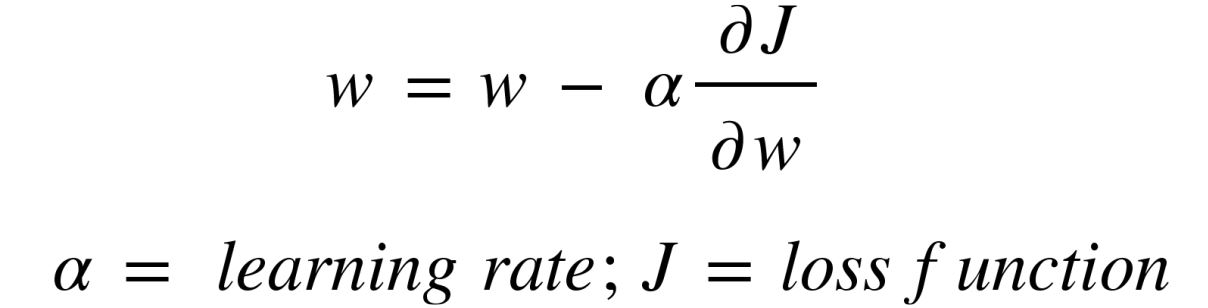


Batch gradient descent, stochastic gradient descent, and mini-batch gradient descent are the three variants of gradient descent. Which variant would be
used is determined by the size of data available










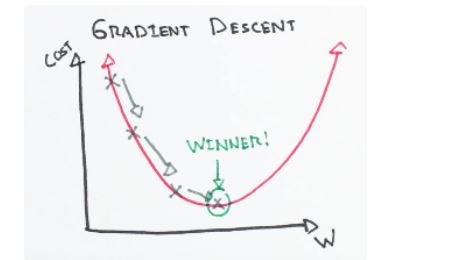


Batch	gradient	descent computes the gradient of the cost function with the entire training set. Stochastic gradient descent (SDG) uses each sample in the
training set to perform updates at a time. It is faster than batch gradient descent. Mini-batch gradient descent combines the logic of other variants by using
only mini-batches of training examples to update weights. It allows for a stable convergence, because the variance of the parameter updates are also
reduced.

**Gradient Descent with Momentum**: similar to gradient descent, the addition of momentum to the algorithm helps speed up convergence, by accelerating
the gradient vectors in the right direction. With gradient descent, movement is not always in the optimal direction. However, gradient descent with
momentum oscillates in the right direction, by considering past gradients, and computing exponentially weighted averages of the gradients which are used

to update the weights.

Adagrad - Adaptive Gradients: adagrad changes the learning rate for every update by tracking the sum of gradient squared, and uses it to adjust the
gradients in the right direction. Larger updates are performed for infrequent parameters with high learning rates, while smaller updates are performed for
frequent parameters with low learning rates. This can be interpreted thus; “the more a parameter is updated, the less updates are required for the parameter
in future updates, to allow for the updates of other parameters”. This makes it a suitable choice for sparse data.

RMSProp - Root Mean Square Propagation: though similar to Adagrad, RMSProp provides an exponentially decaying average as opposed to the sum of
the gradients by Adagrad. It changes the learning rate slower and converges faster than Adagrad, by using a decay rate to consider the gradients of recent
time steps.

Adam - Adaptive Moment Estimation: this algorithm uses the ϐirst and second moments of gradients while adapting the learning rate for each weight of
the neural network. It can be likened to RMSProp with momentum such that exponential moving averages of gradients are calculated then squared. It also
beneϐits fromthe advantages of Adagrad in that it works well with sparse gradients.

In [11]:
#Building a Sequential Feed Forward Network in Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_labels, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
 model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [13]:
 history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)
 
test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 31us/sample - loss: 0.6895 - acc: 0.8174 - val_loss: 0.2590 - val_acc: 0.9277
Epoch 2/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.2342 - acc: 0.9326 - val_loss: 0.1872 - val_acc: 0.9494
Epoch 3/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.1726 - acc: 0.9508 - val_loss: 0.1527 - val_acc: 0.9573
Epoch 4/20
50000/50000 [==============================] - 2s 30us/sample - loss: 0.1351 - acc: 0.9610 - val_loss: 0.1272 - val_acc: 0.9651
Epoch 5/20
50000/50000 [==============================] - 1s 30us/sample - loss: 0.1091 - acc: 0.9687 - val_loss: 0.1126 - val_acc: 0.9688
Epoch 6/20
50000/50000 [==============================] - 2s 30us/sample - loss: 0.0902 - acc: 0.9742 - val_loss: 0.1053 - val_acc: 0.9706
Epoch 7/20
50000/50000 [==============================] - 2s 30us/sample - loss: 0.0765 - acc: 0.9788 - val_loss: 0.

Text(0.5, 1.0, 'Loss Curves - before regularisation')

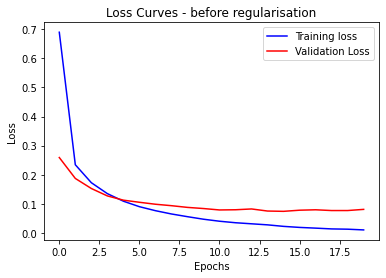

In [14]:
 #Check for Overfitting
plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [15]:
 from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))
 
reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
 
reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 38us/sample - loss: 0.9638 - acc: 0.6949 - val_loss: 0.2971 - val_acc: 0.9139
Epoch 2/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.3752 - acc: 0.8890 - val_loss: 0.2026 - val_acc: 0.9426
Epoch 3/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.2800 - acc: 0.9173 - val_loss: 0.1606 - val_acc: 0.9548
Epoch 4/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.2281 - acc: 0.9319 - val_loss: 0.1407 - val_acc: 0.9583
Epoch 5/20
50000/50000 [==============================] - 2s 35us/sample - loss: 0.1962 - acc: 0.9429 - val_loss: 0.1229 - val_acc: 0.9649
Epoch 6/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.1702 - acc: 0.9496 - val_loss: 0.1124 - val_acc: 0.9682
Epoch 7/20
50000/50000 [==============================] - 2s 36us/sample - loss: 0.1550 - acc: 0.9557 - val_loss: 0.

In [16]:
 test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0688 - acc: 0.9800
Test loss: 0.06883566454120446
Test accuracy: 0.9800000190734863


Text(0.5, 1.0, 'Loss Curves - after regularisation')

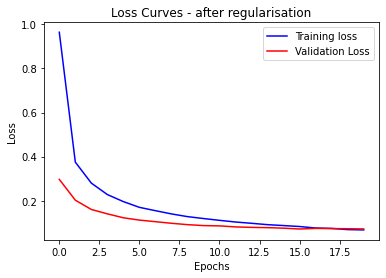

In [17]:
 plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

# lesson 3- Convolutional	Neural	Networks
Motivations
Convolutional neural network also known as ConvNets or CNN is a class of deep, feed-forward, artiϐicial neural networks speciϐically designed for image
input. As a result of their performance in contrast to the traditional, fully-connected neural networks, CNNs have been widely applied in computer vision
tasks such as image recognition, image classiϐication, object detection, etc. More recently, they are being explored in the natural language processing domain
by researchers. In a nutshell, we can teach computers to “see” using CNNs.
An image is a grid of numbers that represent pixel values, which are interpreted as a matrix of values by a computer. The convolution operation that occurs
in a CNN network allows for sparse representation of inputs, by concentrating only on the relevant features. This is different from using a regular neural
network which will increase the number of computations, by performing matrix multiplications. Additionally, parameter sharing in CNNs saves memory by
using the same weight parameters for all neurons in the same feature map.
- Convolution operator.
- Layers, ϐilters, pooling and feature maps
Convolutional layer, pooling layer, and fully-connected layer are the three main types of layers used to build the CNN architecture.
Convolutional layer: This is the building block of CNNs. In mathematics, convolution refers to a mathematical operation on two functions to create a third
function. Unsurprisingly, as the name implies, a convolution operator is used to extract features such as colour, edges orientation, etc from input images in
CNNs. It learns the image features using small squares of the input data to preserve the relationships between pixels. A convolution is performed on the
input data using a ϐilter or kernel to produce a feature map. By including more layers, the network is able to learn more high-level features, and have a better
understanding of the images, and better identify unseen images. Considering a 5x5 image matrix with pixel values 0 and 1; and a 3x3 ϐilter matrix, the
convolution of both matrices results in a feature map as shown below



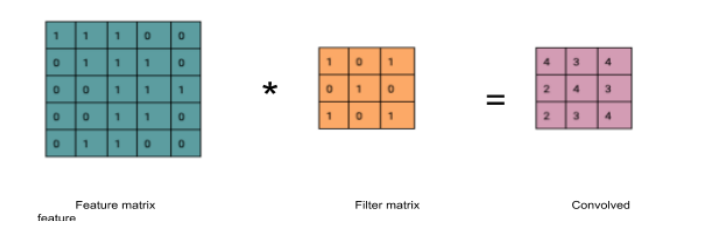




We slide the ϐilter matrix over the feature matrix by a set number of pixels, and perform an element-wise multiplication for each position. It is important to
note that different ϐilters perform different operations, by acting as feature detectors from the original images. The number of pixels or size of step the ϐilter
moves over is known as stride. To introduce non-linearity, a relu activation is applied after every convolution operation in the convolutional layer.

Pooling layer: this is the layer periodically inserted between successive convolution layers, where dimensionality reduction is performed by pooling.
Pooling (also called downsampling) helps control overϐitting, trains faster, and reduces the number of parameters and computations in the network.
Although this reduces dimensionality, the important information is still retained. Maximum, average, and sum pooling are different types of pooling
commonly used with max. Max pooling takes the maximum element from the feature map


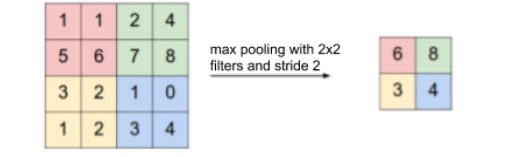

Fully connected layer: the features extracted from the convolution and pooling layers are fed into the fully connected layer, to use for classiϐication into
different classes in the training set, and to also learn the non-linear combinations of the features, since it is possible to obtain even better results with a combination of the features. Softmax is used as the activation function to obtain probabilities of the different classes which sum to 1.
Combining the layers described, for a CNN, an input image is provided for the convolution layer, ϐilters are applied with strides to perform convolution,
pooling is done for dimensionality reduction, more convolution and pooling layers can be added, the output of these layers is fed into a fully-connected
layer, and an activation function is applied to obtain ϐinal probabilities for the classes.


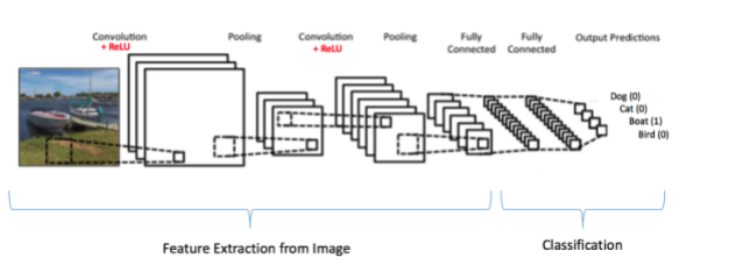











# lesson 4-Introduction	to	Large	Scale	Image	Recognition	Architecture
Over time, numerous CNN architectures have been developed, most of which follow the fundamental method of applying convolution layers to the input
and periodically downsampling. In this section, we will brieϐly discuss some of these architectures.
## Image Net
ImageNet is a large image dataset commonly used for research with the images labelled and organised by hierarchy. The dataset contains more than 14
million images labelled into over 20,000 categories. ImageNet Large Scale Visual Recognition Challenge (ILSVRC) is an annual competition (2010 - 2017)
where computer vision algorithms, especially for image classiϐication and object detection, are evaluated and compared using subsets of the ImageNet. The
challenge aims to set state of the art results for various tasks and techniques. Some of the architectures we will discuss have proven to be successful in ILSVRC.AlexNet,VGG,ResNetand DenseNet

## AlexNet
 Introduced in 2012, this network consists of 8 layers - 5 convolutional layers, 2 fully-connected layers, and one fully-connected output layer won the ILSVRC challenge in 2012. Although it’s similar to the LeNet architecture previously developed, AlexNet uses relu as the activation function, as opposed to the tanh which caused the model to train about six times faster. Additionally, max pooling layers with a window size of 3x3 and a stride of 2 overlap in this architecture.

## VGG - Visual Geometry Group
this was introduced by Simonyan and Zisserman in 2014. This architecture which was the second runner up for ILSVRC in
2014 is a network that is roughly twice as deep. AlexNet uses convolutions with 3x3 kernels with padding of 1; and a 2x2 max pooling matrix with a stride
of 2. It has 13 convolutional layers and 3 fully-connected layers, alongside a relu activation function as in AlexNet.

## ResNet - Residual Neural Network
Used in 2015 to win ILSVRC, identiϐied that although deeper networks performed better, they became difϐicult to
optimise and suffered from vanishing gradients. To address these problems, skip connections were introduced in ResNet by authors from Microsoft
Research with a speculation that deeper learners should be able to learn equally as shallow layers. This is a very deep network with 152 layers trained using
skip connections, such that the signal for a layer is included in the output of the layer located higher up.

## Transfer Learning and Image Augmentation
Transfer learning is a concept of exporting the knowledge obtained in a particular task to a new task. Using the features that an existing model learnt with a
lot more data can improve generalization in a new task or setting. The motivation for transfer learning stemmed from the fact that although many
supervised models require a large number of labeled data, many scenarios typically do not have this because it’s time consuming and difϐicult to label data
points. When performing transfer learning, what, when, and how to transfer are important questions that must be answered. The portion of the knowledge
learnt by the source model which would be beneϐicial to the new model to improve performance should be identiϐied.
Also, while transfer learning is an option that can be used when training new models, it might not always improve performance in the new model, instead it
might even contribute negatively.
Finally, it is helpful to identify how the knowledge will be transferred between models using different techniques and algorithms. For example, in computer
vision, pre-trained models for challenging tasks using ImageNet are readily available to be used in transfer learning. Pre-trained models are models that have
been trained on large datasets regularly reused in similar domains and tasks. Pre-trained models can serve as feature extractors or even used as they are. As
explained earlier, the convolution layers that receive the inputs in CNNs learn a lot of low-level features in images, more complex features learnt in the
middle layers, and the results of these computations are interpreted with the output layer. With a proper understanding of this, the relevant portions can be
selected and integrated when creating new networks, either by freezing the existing weights to prevent updates; or update these weights when training the
new model, hence, indirectly serving as a weight initialisation phase for the new model. Some of the models discussed above can be used for transfer
learning in computer vision tasks.
Image augmentation in computer vision is not new, in fact, it is extremely important for sparse datasets. As mentioned earlier, augmentation helps to create
a larger dataset by adding noise, rotating, ϐlipping, cropping, rotating etc to the training dataset. This helps reduce overϐitting and improve the model’s
capacity to generalise even to unfamiliar scenarios in new unseen data.

# lesson 5 - Object	Detection	-	Multi-Object	Classiϐication	plus	Localization
## Motivations and Terms
In object localisation tasks, the location of objects in images are identiϐied and put in boundary boxes, while
classiϐication assigns a label to each image. Object detection, often referred to as object recognition, involves a
combination of object classiϐication and object localisation such that different objects in an image are found and
classiϐied. In object detection, the output is variable in length because the number of objects detected in different
images may change. Object detection can be used for face detection as seen in some cameras, counting, and visual
search engines such as those of Pinterest, and aerial image analysis. The problem with obtaining a variable number of
objects is that it becomes difϐicult to obtain ϐixed-sized vectors. However, sliding windows computed
convolutionally are commonly used to resolve this.
Region-based Convolutional Neural Network (R-CNN) is a well-known architecture used for object detection, such
that a selective search algorithm generates about 2000 region proposals, which are later passed to a CNN for feature
extraction. An SVM (Support Vector Machine) is used to classify objects in the region proposal, then a boundary box
regression is used to localise objects present. Region proposals are smaller parts of the original image identiϐied to
possibly contain the objects being searched for. Bounding box regressor uses a scale-invariant linear regression
model to create bounding boxes for the objects. They learn a target transformation between the predicted proposal
and the ground truth. When training the model, pairs of predicted and ground truth of four localisation dimensions
are used such that the predicted bounding box p	=	(p ,	p ,	p ,	p ) with p and p as the center coordinates, p the
width and p the height while the ground truth is g=	(g,	g ,	g ,	g ). The transformation between both boxes using the
linear regressor can be represented as: ĝ =p d (p)	+	p ,	ĝ =p d (p)	+	p ,	ĝ =p exp(d (p)),	ĝ =p exp(d (p))



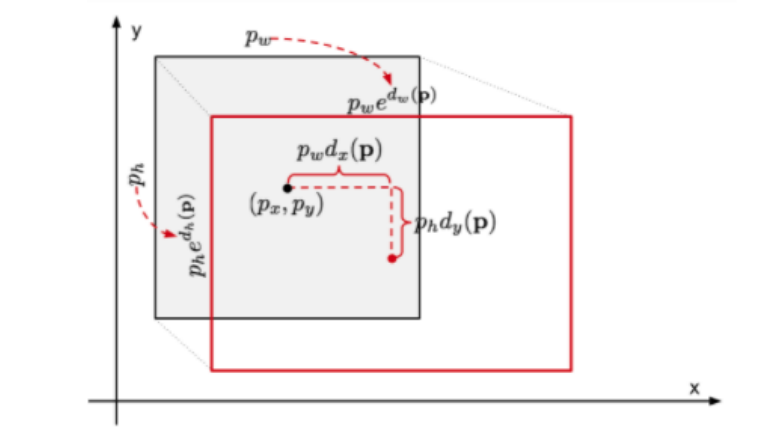
A downside of R-CNN is that it is computationally expensive and slow due to the many forward computations performed by CNNs on the proposed regions for a single image. Another object detection algorithm that is less computationally expensive is a type of single shot detection (SSD) algorithm called You Only Look Once “YOLO”. It is a cutting-edge detection algorithm that can identify distinct objects within the space of an image. It looks at the image once, divides it into grid cells which are responsible for predicting bounding boxes, and output a score known as the Intersection Over Union (IOU). For each bounding box, the grid cells also predict a class alongside the probability distribution over all possible classes. The class-speciϐic conϐidence score is a multiplication of the individual box conϐidence predictions, and the conditional class probabilities.